# Global Superstore – Exploratory Data Analysis & Profitability Insights

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine


## Data Overview and Initial Inspection

In [2]:
df=pd.read_csv("Global_Superstore.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

In [3]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,1000.000000,194.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,25079.328000,53966.170103,1710.971470,5.55800,0.092840,288.920440,272.384897
std,12897.726632,33734.306466,1259.239238,2.71846,0.148666,574.504782,176.160716
min,58.000000,2920.000000,1.910000,1.00000,0.000000,-3059.820000,1.070000
25%,15118.750000,19134.000000,826.907500,4.00000,0.000000,10.037500,209.827500
50%,25084.500000,60564.000000,1585.115000,5.00000,0.000000,190.685000,258.897500
75%,34524.000000,88187.500000,2477.812500,7.00000,0.150000,518.872500,351.070250
max,51284.000000,98198.000000,9892.740000,14.00000,0.800000,4946.370000,923.630000


In [4]:
df.shape

(1000, 24)

## Data Preparation

In [5]:
df.columns
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")
df.columns=df.columns.str.replace("-","_")
df.columns


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'postal_code', 'city',
       'state', 'country', 'region', 'market', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [6]:
df["order_date"]=pd.to_datetime(df["order_date"])
df["ship_date"]=pd.to_datetime(df["ship_date"])


In [7]:
df["ship_days"]=(df["ship_date"]-df["order_date"]).dt.days
df["profit_margin"]=df["profit"]/df["sales"]
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,ship_days,profit_margin
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.00,62.15,40.770,High,2,0.279980
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.10,-288.77,923.630,Critical,2,-0.077848
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.490,Medium,1,0.177766
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.160,Medium,2,-0.033376
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.040,Critical,1,0.109963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24278,IN-2015-JF1541527-42095,2015-04-01,2015-04-05,Standard Class,JF-1541527,Jennifer Ferguson,Consumer,NaN,Liaoyang,...,Tables,"Bevis Wood Table, with Bottom Storage",2614.69,7,0.30,-821.96,203.260,Medium,4,-0.314362
996,36249,CA-2015-AS10225140-42347,2015-12-09,2015-12-13,Second Class,AS-102251404,Alan Schoenberger,Corporate,94109.0,San Francisco,...,Appliances,Belkin 8-Outlet Premiere SurgeMaster II Surge ...,69.48,1,0.00,20.84,12.040,High,4,0.299942
997,30517,IN-2014-CK1259592-41929,2014-10-17,2014-10-19,Second Class,CK-1259592,Clytie Kelty,Consumer,NaN,Taupo,...,Copiers,"Canon Fax Machine, Laser",636.78,2,0.00,286.50,203.200,Critical,2,0.449920
998,1408,MX-2014-SS2014018-41658,2014-01-19,2014-01-26,Standard Class,SS-2014018,Saphhira Shifley,Corporate,NaN,Araguaína,...,Bookcases,"Bush Classic Bookcase, Traditional",2751.20,10,0.00,110.00,203.132,Medium,7,0.039983


## 🚀 Profit Leak Analysis

In [8]:
loss_orders=df[df["profit"]<0]
loss_orders[["sales", "discount", "shipping_cost", "profit"]].describe()


,sales,discount,shipping_cost,profit
count,175.000000,175.000000,175.000000,175.000000
mean,1364.507486,0.307611,245.544103,-351.583486
std,945.142718,0.200241,167.646621,553.770810
min,1.910000,0.002000,1.110000,-3059.820000
25%,663.495000,0.150000,203.786500,-446.145000
50%,1293.680000,0.200000,236.690000,-127.580000
75%,1997.595000,0.470000,335.085000,-25.780000
max,3709.400000,0.800000,923.630000,-0.020000


In [9]:
high_sales=df["sales"].quantile(.7)
high_sale_loss=df[(df["sales"]>=high_sales)&(df["profit"]<0)]
high_sale_loss
high_sale_loss[["sales", "discount", "shipping_cost", "profit"]].describe()



,sales,discount,shipping_cost,profit
count,34.000000,34.000000,34.000000,34.000000
mean,2798.650588,0.254706,392.655588,-628.043529
std,402.579117,0.143806,177.795924,803.527180
min,2228.640000,0.070000,203.260000,-3059.820000
25%,2445.472500,0.150000,271.678000,-750.882500
50%,2762.340000,0.200000,335.085000,-279.280000
75%,3092.575000,0.350000,454.932500,-128.727500
max,3709.400000,0.500000,923.630000,-0.020000


In [10]:
conditions=[(df["discount"]==0)
            ,((df["discount"]>0)
            &(df["discount"]<=.10)),
            ((df["discount"]>.10)&(df["discount"]<=.20))
            ,((df["discount"]>.20))]
values=["0%","<10%","10%-20%",">20%"]

df["discount_category"]=np.select(conditions,values,default="-")


df.groupby("discount_category").agg(orders=("order_id", "count"),
                                    profit=("profit","sum"),
                                    avg_profit=("profit","mean"),
                                    sales=("sales","sum"),
                                    avg_sales=("sales","mean"),
                                    profit_magrin=("profit_margin","mean")).reset_index().sort_values(by="profit")

,discount_category,orders,profit,avg_profit,sales,avg_sales,profit_magrin
3,>20%,101,-50454.84,-499.552871,144162.93,1427.355743,-0.446345
1,10%-20%,175,20946.74,119.695657,198984.22,1137.052686,0.123749
2,<10%,164,57286.50,349.307927,333031.61,2030.680549,0.165509
0,0%,560,261142.04,466.325071,1034792.71,1847.844125,0.263867


### Key Findings

- Orders with discounts above 20% consistently generate losses.
- High sales volume does not guarantee profitability when discounts are excessive.
- Discounts below 10% offer the best balance between sales and profit margins.


## 🌍 Phase 3 – Country & Region Profitability Analysis

In [11]:
country_profit=df.groupby("country").agg(
    orders=("order_id","nunique"),
    total_sales=("sales","sum"),
    avg_sales=("sales","mean"),
    total_profit=("profit","sum"),
    avg_profit=("profit","mean"),
    avg_profit_margin=("profit_margin","mean"),
    avg_ship_days=("ship_days","mean"),
    avg_discount=("discount","mean")).reset_index().sort_values(by="total_profit",ascending=False)
country_profit.head(10)

,country,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount
40,India,59,153805.65,2403.213281,36467.61,569.806406,0.252467,3.359375,0.000000
20,China,71,160494.10,2139.921333,30230.97,403.079600,0.199637,2.946667,0.030667
5,Australia,83,190368.52,2239.629647,27297.76,321.150118,0.129839,3.094118,0.128235
88,United Kingdom,36,90469.50,2319.730769,26086.92,668.895385,0.256648,3.230769,0.025641
32,France,73,135114.76,1777.825789,17283.66,227.416579,0.126610,2.368421,0.143421
34,Germany,34,91884.49,2356.012564,14585.43,373.985385,0.170570,3.153846,0.071795
53,Mexico,41,75930.79,1807.875952,12623.19,300.552143,0.146612,2.690476,0.071524
89,United States,100,54535.08,281.108660,12063.97,62.185412,0.137253,3.695876,0.154381
79,Spain,23,45410.89,1892.120417,11362.81,473.450417,0.200964,2.541667,0.041667
44,Italy,17,39494.77,2323.221765,11137.06,655.121176,0.167798,2.411765,0.070588


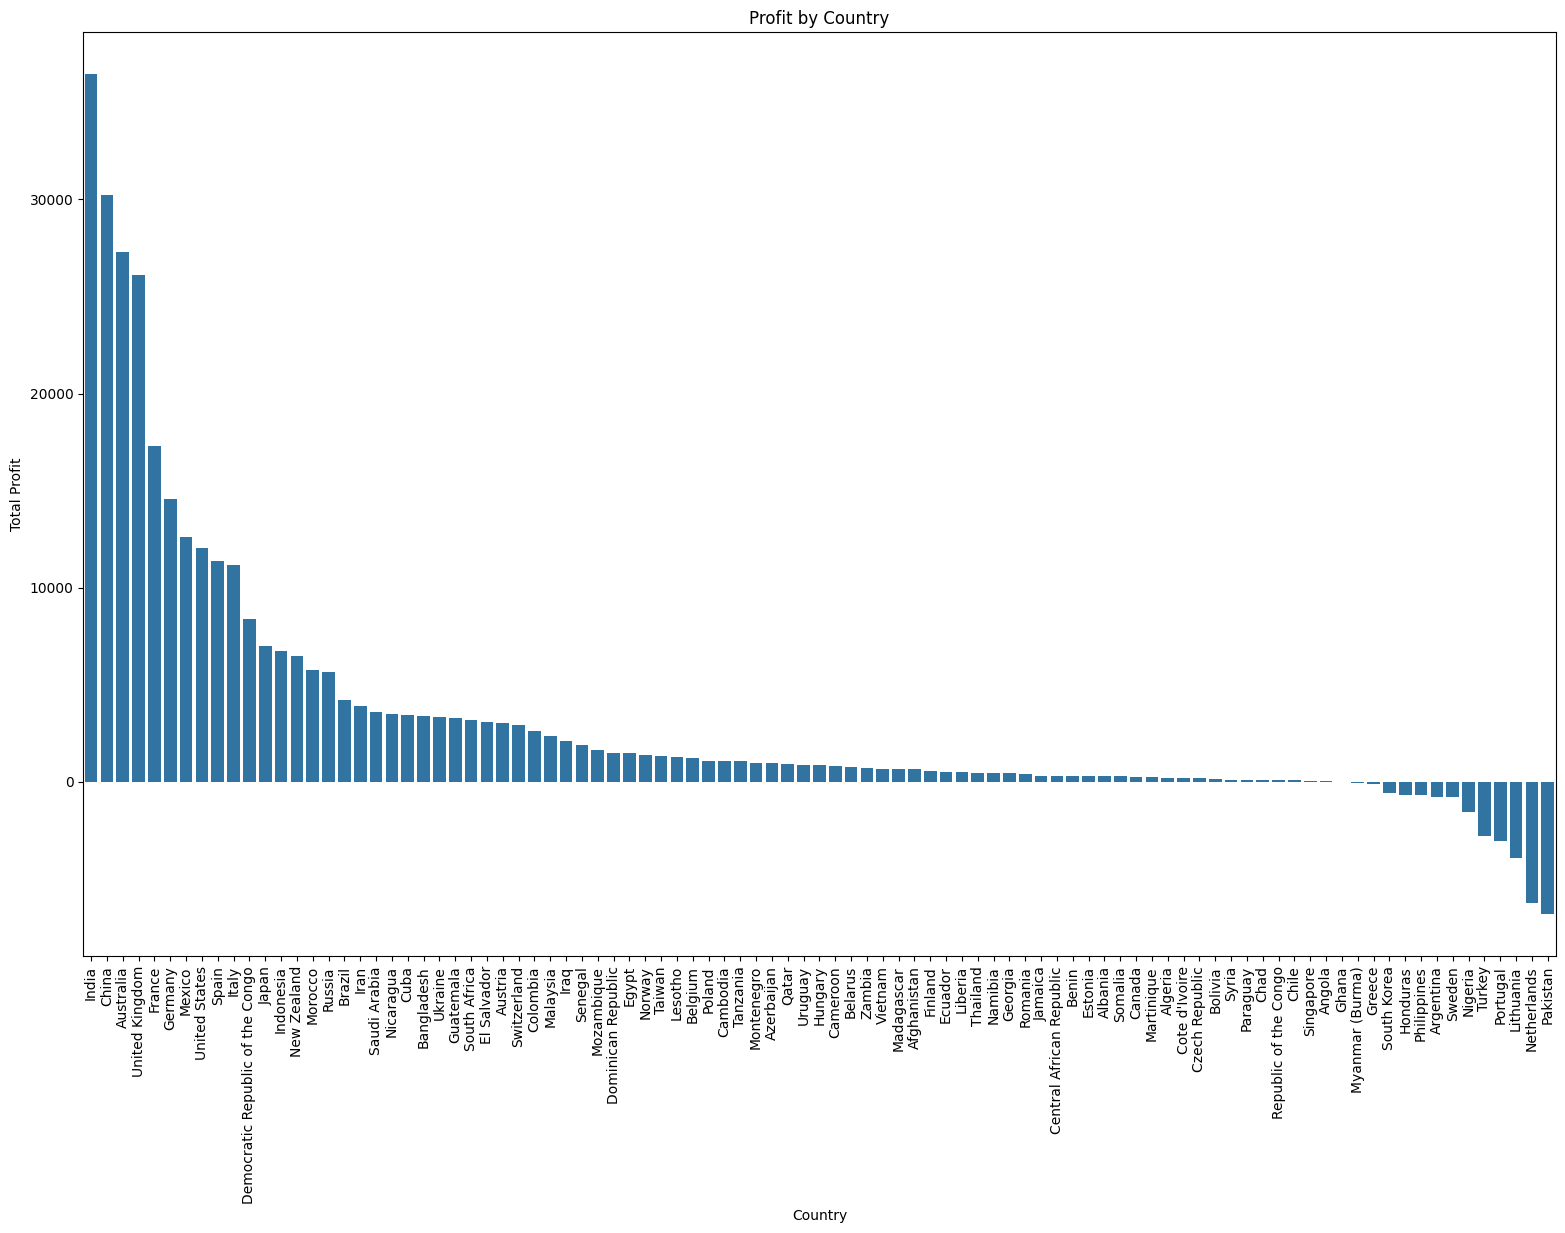

In [12]:
plt.figure(figsize=(19,12))
sns.barplot(data=country_profit,x="country",y="total_profit")
plt.xticks(rotation=90)
plt.title("Profit by Country")
plt.xlabel("Country")
plt.ylabel("Total Profit")
plt.show()

In [13]:
(country_profit["total_profit"].corr(country_profit["avg_ship_days"]),
country_profit["total_profit"].corr(country_profit["avg_discount"]))

(np.float64(0.12010945202369126), np.float64(-0.22330658787392715))

In [14]:
region_profit=df.groupby("region").agg(
    orders=("order_id","nunique"),
    total_sales=("sales","sum"),
    avg_sales=("sales","mean"),
    total_profit=("profit","sum"),
    avg_profit=("profit","mean"),
    avg_profit_margin=("profit_margin","mean"),
    avg_ship_days=("ship_days","mean"),
    avg_discount=("discount","mean")).reset_index().sort_values(by="total_profit",ascending=False)
region_profit.head(10)

,region,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount
6,Eastern Asia,83,193590.60,2151.006667,37911.16,421.235111,0.188635,2.900000,0.038889
15,Southern Asia,82,205466.26,2361.681149,37536.60,431.455172,0.196660,3.206897,0.031034
11,Oceania,96,220809.08,2208.090800,33777.56,337.775600,0.137058,2.990000,0.117000
20,Western Europe,122,259576.28,1981.498321,32783.40,250.254962,0.125829,2.641221,0.119847
10,Northern Europe,45,103888.63,2164.346458,23552.73,490.681875,0.180459,3.062500,0.060417
3,Central America,73,140966.21,1830.730000,21741.95,282.362987,0.149275,2.883117,0.054779
16,Southern Europe,45,94441.11,2053.067609,20557.50,446.902174,0.154171,2.543478,0.067391
7,Eastern Europe,23,45662.19,1985.312609,12228.45,531.671739,0.277784,2.652174,0.000000
13,Southeastern Asia,70,147337.60,2104.822857,10561.80,150.882857,0.063654,2.828571,0.159429
2,Central Africa,13,33810.48,2415.034286,9668.22,690.587143,0.257824,3.285714,0.000000


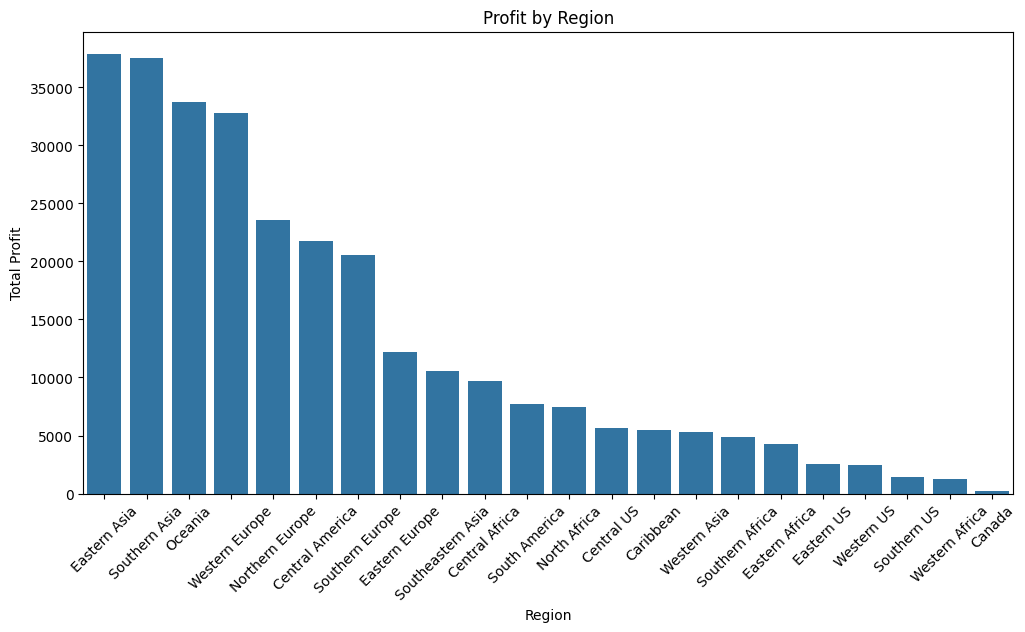

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data=region_profit,x="region",y="total_profit")
plt.xticks(rotation=45)
plt.title("Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.show()

In [16]:
(region_profit["total_profit"].corr(region_profit["avg_ship_days"]),
region_profit["total_profit"].corr(region_profit["avg_discount"]))

(np.float64(-0.059113243104184914), np.float64(-0.09991375415611575))

### Key Observations

- Several countries generate high sales volumes but comparatively low or negative total profit, indicating inefficiencies beyond demand.
- Average discount levels show a clear inverse relationship with total profit across countries.
- Countries offering higher average discounts tend to experience significant margin erosion, even when sales performance is strong.

### Correlation Insights

- **Average Discount vs Total Profit** shows a negative correlation, confirming that aggressive discounting is a primary contributor to losses.
- **Average Shipping Days vs Total Profit** shows a very weak relationship, suggesting logistics delays are not a major determinant of profitability at the country level.

### Business Interpretation

- Profit leakage across countries is largely driven by **pricing strategy rather than operational delays**.
- Discounting beyond an optimal range reduces margins faster than it increases sales value.
- Improving profitability should focus on **revisiting discount policies on a country-by-country basis**, rather than uniform discounting across markets.

Overall, discount strategy emerges as the most influential lever for improving geographic profitability in the dataset.


## 📍Product & Category Profitability Analysis

In [17]:
category_profit=df.groupby("category").agg(
    orders=("order_id","nunique"),
    total_sales=("sales","sum"),
    avg_sales=("sales","mean"),
    total_profit=("profit","sum"),
    avg_profit=("profit","mean"),
    avg_profit_margin=("profit_margin","mean"),
    avg_ship_days=("ship_days","mean"),
    avg_discount=("discount","mean")).reset_index().sort_values(by="total_profit",ascending=False)
category_profit

,category,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount
2,Technology,381,756983.02,1916.412709,145068.68,367.262481,0.179304,2.956962,0.066759
0,Furniture,315,601492.31,1845.068436,82188.95,252.113344,0.117906,2.984663,0.105031
1,Office Supplies,228,352496.14,1263.427025,61662.81,221.013656,0.151333,3.161290,0.115520


In [18]:
sub_category_profit=df.groupby("sub_category").agg(
    orders=("order_id","nunique"),
    total_sales=("sales","sum"),
    avg_sales=("sales","mean"),
    total_profit=("profit","sum"),
    avg_profit=("profit","mean"),
    avg_profit_margin=("profit_margin","mean"),
    avg_ship_days=("ship_days","mean"),
    avg_discount=("discount","mean")).reset_index().sort_values(by="total_profit",ascending=False)
sub_category_profit

,sub_category,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount
13,Phones,176,417939.31,2334.856480,75119.47,419.661844,0.149878,3.156425,0.072626
6,Copiers,125,231104.67,1834.164048,52315.19,415.199921,0.231945,2.626984,0.040952
1,Appliances,125,289711.30,2317.690400,48518.99,388.151920,0.139953,2.992000,0.087920
4,Bookcases,128,240688.73,1851.451769,45483.14,349.870308,0.182304,2.800000,0.052308
5,Chairs,95,179648.44,1891.036211,23245.88,244.693474,0.102533,2.978947,0.116105
16,Tables,85,179292.88,2060.837701,13051.69,150.019425,0.045469,3.183908,0.167931
11,Machines,52,71366.87,1372.439808,8992.06,172.924231,0.121444,2.923077,0.108462
0,Accessories,37,36572.17,962.425526,8641.96,227.420000,0.222548,3.157895,0.067632
3,Binders,31,19751.19,519.768158,7435.09,195.660263,-0.094034,3.684211,0.344737
14,Storage,42,37592.32,835.384889,4490.04,99.778667,0.087857,2.755556,0.065333


In [19]:
sub_category_profit[(sub_category_profit["total_profit"]<0)&
                    (sub_category_profit["total_sales"]>0)]

,sub_category,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount
15,Supplies,7,2037.92,291.131429,-89.85,-12.835714,0.069571,2.428571,0.085714


In [20]:
product_profit=df.groupby("product_name").agg(
    orders=("order_id","nunique"),
    total_sales=("sales","sum"),
    avg_sales=("sales","mean"),
    total_profit=("profit","sum"),
    avg_profit=("profit","mean"),
    avg_profit_margin=("profit_margin","mean"),
    avg_ship_days=("ship_days","mean"),
    avg_discount=("discount","mean")).reset_index().sort_values(by="total_profit",ascending=False)
product_profit

,product_name,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount
355,"Motorola Smart Phone, Full Size",17,48542.52,2855.442353,13088.28,769.898824,0.270891,3.823529,0.031765
282,"Hoover Stove, Red",7,23477.81,3353.972857,10288.61,1469.801429,0.378935,3.142857,0.057143
143,"Cisco Smart Phone, Full Size",14,41325.20,2951.800000,9662.99,690.213571,0.233203,4.000000,0.019286
144,"Cisco Smart Phone, with Caller ID",8,22047.89,2755.986250,6607.40,825.925000,0.258184,4.125000,0.081250
368,"Nokia Smart Phone, Full Size",14,27661.97,1975.855000,5765.12,411.794286,0.205385,3.357143,0.030000
...,...,...,...,...,...,...,...,...,...
39,"Barricks Computer Table, Fully Assembled",2,3129.17,1564.585000,-1421.81,-710.905000,-0.398909,2.000000,0.385000
299,"Ikea Library with Doors, Traditional",1,2398.37,2398.370000,-1479.13,-1479.130000,-0.616723,4.000000,0.400000
72,"Breville Microwave, Silver",1,2117.22,2117.220000,-1736.28,-1736.280000,-0.820075,4.000000,0.500000
284,"Hoover Stove, White",9,21179.89,2353.321111,-2348.34,-260.926667,-0.070998,3.333333,0.174444


In [21]:
product_profit.describe()

,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,1.888469,3234.350605,1276.344517,546.163403,200.269883,0.146469,3.049302,0.105092
std,1.860891,5377.997512,1077.831981,1291.821598,437.809349,0.288284,1.601924,0.144676
min,1.000000,1.910000,1.910000,-2750.280000,-2750.280000,-1.696335,0.000000,0.000000
25%,1.000000,196.450000,195.760000,5.320000,5.320000,0.049868,2.000000,0.000000
50%,1.000000,1411.200000,1209.105000,119.550000,97.560000,0.188871,3.000000,0.050000
75%,2.000000,3760.140000,2018.880000,683.900000,366.998571,0.337452,4.000000,0.200000
max,17.000000,48542.520000,9892.740000,13088.280000,4946.370000,0.500000,7.000000,0.800000


In [22]:
product_profit['total_profit'].corr(product_profit["avg_discount"])

np.float64(-0.24406778450950467)

In [23]:
product_profit[(product_profit["total_sales"]>product_profit["total_sales"].quantile(.65))&
               (product_profit["total_profit"]<0)]

,product_name,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount
166,"Dania Library with Doors, Pine",5,8160.13,1632.026000,-12.66,-2.532000,-0.014068,3.400000,0.140000
184,"Epson Inkjet, Wireless",3,4068.86,1356.286667,-25.03,-8.343333,-0.014138,3.666667,0.166667
475,"Smead File Cart, Single Width",2,2560.26,1280.130000,-37.41,-18.705000,-0.015188,2.000000,0.050000
414,"Rogers Lockers, Blue",4,6492.50,1623.125000,-49.42,-12.355000,-0.040983,1.750000,0.092500
463,"Sharp Copy Machine, High-Speed",2,2738.74,1369.370000,-134.06,-67.030000,-0.037633,2.500000,0.035000
65,"Bevis Wood Table, with Bottom Storage",2,4749.13,2374.565000,-139.04,-69.520000,0.002795,3.000000,0.150000
478,"Smead Lockers, Wire Frame",3,4113.72,1371.240000,-156.24,-52.080000,-0.031563,1.666667,0.123333
386,"Office Star Executive Leather Armchair, Black",5,11732.50,2346.500000,-182.82,-36.564000,-0.058717,4.200000,0.180000
431,"Safco Library with Doors, Traditional",1,2455.68,2455.680000,-191.16,-191.160000,-0.077844,5.000000,0.100000
315,"KitchenAid Stove, White",2,5114.61,2557.305000,-204.75,-102.375000,-0.180040,2.500000,0.250000


### High-Sales Loss-Making Products 

While earlier analysis suggested discounting as a key driver of profit loss,
a deeper product-level inspection shows that several high-sales products are
unprofitable even at moderate discount levels.

This indicates that discount alone does not explain these losses. The issue is
likely driven by structural factors such as high shipping costs, low inherent
product margins, and low order volumes, particularly for bulky or heavy items
like furniture and appliances.


Text(0, 0.5, 'Average Profit Margin')

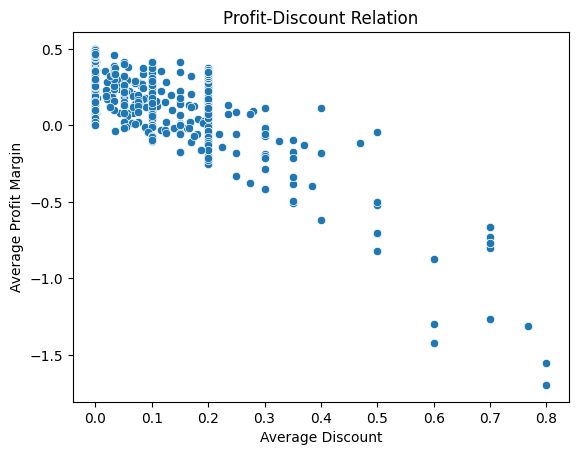

In [24]:
sns.scatterplot(data=product_profit,x="avg_discount",y="avg_profit_margin")
plt.title("Profit-Discount Relation")
plt.xlabel("Average Discount")
plt.ylabel("Average Profit Margin")

### Conclusion

This phase identified the primary drivers of profit loss across products and
regions. Discounting shows a consistent negative relationship with profitability,
especially at higher discount levels.

However, several high-selling products remain unprofitable even with moderate
discounts, indicating structural issues such as low margins and high costs.
Shipping speed was found to have no meaningful impact on profitability.

Overall, profit losses are driven by a combination of aggressive discounting
and unfavorable cost structures rather than operational delays.


## 🪪Customer Segmentation

In [25]:
customer=df.groupby("customer_name").agg(
    orders=("order_id","nunique"),
    total_sales=("sales","sum"),
    avg_sales=("sales","mean"),
    total_profit=("profit","sum"),
    avg_profit=("profit","mean"),
    avg_profit_margin=("profit_margin","mean"),
    avg_ship_days=("ship_days","mean"),
    avg_discount=("discount","mean"),
    total_quantity=("quantity","sum")).reset_index().sort_values(by="total_profit",ascending=False)
customer

,customer_name,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount,total_quantity
6,Adrian Barton,13,17307.24,721.1350,6602.41,275.100417,-0.003406,4.041667,0.204167,85
150,Dave Poirier,3,12871.07,3217.7675,4280.00,1070.000000,0.289103,2.750000,0.075000,34
370,Patrick Jones,1,7958.58,7958.5800,3979.08,3979.080000,0.499974,6.000000,0.000000,14
134,Cynthia Arntzen,2,9298.98,4649.4900,3598.23,1799.115000,0.354949,5.500000,0.000000,17
3,Adam Bellavance,10,11465.85,573.2925,3575.72,178.786000,0.353182,3.900000,0.040000,69
...,...,...,...,...,...,...,...,...,...,...
89,Carl Ludwig,1,1363.20,1363.2000,-1806.24,-1806.240000,-1.325000,0.000000,0.600000,8
485,Valerie Mitchum,2,3760.11,1880.0550,-1960.18,-980.090000,-0.324518,1.500000,0.300000,20
266,Julie Creighton,2,3124.98,1562.4900,-2832.09,-1416.045000,-0.676252,2.000000,0.500000,11
421,Saphhira Shifley,2,6150.86,3075.4300,-2949.82,-1474.910000,-0.430027,5.500000,0.250000,22


In [26]:
customer_profit_percent=(customer["total_profit"]*100/customer["total_profit"].sum()).sort_values(ascending=False)
customer_length=int(len(customer)*.2)
contribution_of_top_20_customers=customer_profit_percent.nlargest(customer_length).sum()
contribution_of_top_20_customers

np.float64(62.696592182955285)

### Top 20% Customers Contribution

The top 20% of customers contribute approximately 63% of total profit, 
confirming that a small subset of customers drives the majority of profitability. 
This highlights the importance of identifying, retaining, and nurturing these high-value customers.


In [27]:
high_profit_customers=customer[(customer["total_sales"]>customer["total_sales"].quantile(.65))&
                                ((customer["total_profit"]>customer["total_profit"].quantile(.65)))]
high_profit_customers
high_profit_customers.describe()

,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount,total_quantity
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,2.754386,6316.028070,2558.436424,1638.871842,716.406959,0.252309,3.215287,0.051292,18.675439
std,2.180206,2319.142044,1207.058805,905.168445,558.438576,0.103025,1.225531,0.058613,14.359170
min,1.000000,3728.430000,301.132609,716.250000,47.616087,-0.049104,0.000000,0.000000,6.000000
25%,2.000000,4554.740000,1897.692500,957.137500,366.873750,0.178277,2.375000,0.000000,11.000000
50%,2.000000,5683.035000,2370.377500,1439.485000,553.415000,0.251419,3.000000,0.037500,14.000000
75%,3.000000,7431.247500,2981.582500,1858.935000,864.293750,0.329972,4.000000,0.085536,19.000000
max,13.000000,17307.240000,7958.580000,6602.410000,3979.080000,0.499974,7.000000,0.300000,85.000000


In [28]:
high_sale_loss_customers=customer[(customer["total_sales"]>customer["total_sales"].quantile(.6))&
                                ((customer["total_profit"]<0))]
high_sale_loss_customers
high_sale_loss_customers.describe()

,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount,total_quantity
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,2.200000,4698.306000,2235.029208,-801.422000,-460.915375,-0.177566,2.641667,0.216867,15.45000
std,0.695852,1390.031966,790.228529,901.708431,700.618990,0.190166,1.395770,0.105259,5.07289
min,1.000000,3403.810000,1321.970000,-3009.440000,-3009.440000,-0.860046,0.000000,0.034000,9.00000
25%,2.000000,3749.175000,1707.950000,-1023.610000,-386.642500,-0.200746,1.500000,0.145833,11.00000
50%,2.000000,4098.720000,1977.112500,-400.180000,-211.262500,-0.131770,2.750000,0.217500,15.50000
75%,2.250000,4944.877500,2455.160000,-274.042500,-131.336250,-0.076458,3.500000,0.261667,17.75000
max,4.000000,8251.180000,4125.590000,-0.290000,-0.096667,-0.002160,5.500000,0.500000,29.00000


In [29]:
loss_customers=customer[(customer["total_sales"]<customer["total_sales"].quantile(.4))&
                                ((customer["total_profit"]<0))]
loss_customers
loss_customers.describe()

,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount,total_quantity
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1.304348,1532.528478,1373.974325,-442.149565,-414.995842,-0.275771,2.429650,0.276926,8.804348
std,1.072268,529.815416,571.190618,534.687547,532.563752,0.327316,1.497696,0.165495,9.842356
min,1.000000,473.850000,108.470625,-1806.240000,-1806.240000,-1.325000,0.000000,0.085000,3.000000
25%,1.000000,1090.137500,975.200000,-706.155000,-513.341250,-0.483429,1.500000,0.150000,5.000000
50%,1.000000,1587.880000,1347.095000,-214.705000,-146.570000,-0.116854,2.000000,0.218750,7.000000
75%,1.000000,1928.825000,1789.712500,-78.520000,-59.560000,-0.051435,3.000000,0.400000,8.750000
max,7.000000,2398.370000,2398.370000,-0.190000,-0.143750,0.037652,7.000000,0.700000,65.000000


In [30]:
onetime_customers=customer[(customer["orders"]==1)]
repeating_customers=customer[(customer["orders"]>1)]
onetime_customers.shape[0]*100/(repeating_customers.shape[0]+onetime_customers.shape[0])

57.45967741935484

In [31]:
repeating_customers["total_profit"].sum()*100/repeating_customers["total_sales"].sum()

np.float64(16.553156104757313)

In [32]:
onetime_customers["total_profit"].sum()*100/onetime_customers["total_sales"].sum()

np.float64(17.463515973444213)

In [33]:
customer[customer["avg_discount"]>.2]

,customer_name,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount,total_quantity
6,Adrian Barton,13,17307.24,721.135000,6602.41,275.100417,-0.003406,4.041667,0.204167,85
344,Mike Pelletier,3,4543.69,1514.563333,929.17,309.723333,0.120798,2.333333,0.206667,10
131,Craig Reiter,3,7395.72,2465.240000,845.88,281.960000,-0.049104,1.666667,0.300000,15
444,Stefanie Holloman,1,2794.25,2794.250000,515.75,515.750000,0.184575,3.000000,0.350000,5
270,Justin Hirsh,2,3097.44,1548.720000,269.46,134.730000,0.153416,2.500000,0.235000,15
136,Cynthia Voltz,2,3687.24,1843.620000,242.88,121.440000,-0.090014,2.500000,0.300000,10
215,Hallie Redmond,1,2841.66,2841.660000,189.42,189.420000,0.066658,6.000000,0.250000,8
263,Joy Smith,2,3826.60,1913.300000,149.88,74.940000,-0.000393,4.000000,0.335000,12
179,Emily Ducich,1,1719.81,1719.810000,117.66,117.660000,0.068415,0.000000,0.270000,5
451,Stuart Van,3,6112.77,2037.590000,44.37,14.790000,0.070741,4.000000,0.233333,18


In [34]:
customer[customer["avg_discount"]<=.2]

,customer_name,orders,total_sales,avg_sales,total_profit,avg_profit,avg_profit_margin,avg_ship_days,avg_discount,total_quantity
150,Dave Poirier,3,12871.07,3217.7675,4280.00,1070.0000,0.289103,2.750000,0.075,34
370,Patrick Jones,1,7958.58,7958.5800,3979.08,3979.0800,0.499974,6.000000,0.000,14
134,Cynthia Arntzen,2,9298.98,4649.4900,3598.23,1799.1150,0.354949,5.500000,0.000,17
3,Adam Bellavance,10,11465.85,573.2925,3575.72,178.7860,0.353182,3.900000,0.040,69
456,Susan Pistek,3,9548.94,3182.9800,3478.92,1159.6400,0.357752,4.666667,0.090,19
...,...,...,...,...,...,...,...,...,...,...
294,Laurel Workman,2,2345.31,1172.6550,-291.24,-145.6200,0.037652,1.500000,0.175,7
440,Shui Tom,2,4276.09,2138.0450,-323.17,-161.5850,-0.096489,4.000000,0.150,16
475,Tom Ashbrook,2,8251.18,4125.5900,-435.56,-217.7800,-0.071571,5.000000,0.125,17
458,Tamara Chand,2,3403.81,1701.9050,-924.29,-462.1450,-0.218903,3.500000,0.175,9


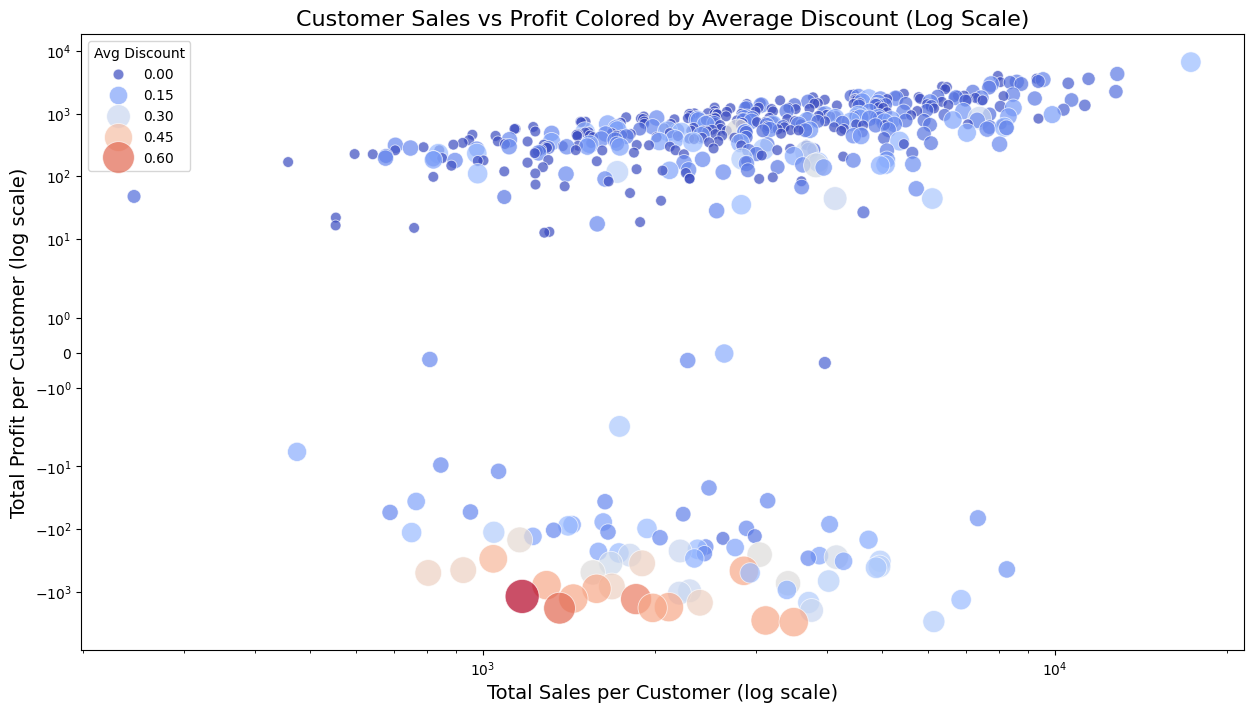

In [35]:
plt.figure(figsize=(15,8))

scatter = sns.scatterplot(
    data=customer,
    x="total_sales",
    y="total_profit",
    hue="avg_discount",
    palette="coolwarm",
    size="avg_discount",
    sizes=(60,600),
    alpha=0.7
)

plt.xscale("log")   # Log scale for sales
plt.yscale("log")   # Log scale for profit (use log only if all profits > 0)
plt.title("Customer Sales vs Profit Colored by Average Discount (Log Scale)", fontsize=16)
plt.xlabel("Total Sales per Customer (log scale)", fontsize=14)
plt.ylabel("Total Profit per Customer (log scale)", fontsize=14)
plt.legend(title="Avg Discount")
plt.yscale("symlog")

plt.show()


### Customer Profitability and Discount Analysis

- **Top customers drive most profit**: Top 20% of customers contribute ~63% of total profit.
- **Repeat vs One-Time**: 57.5% of customers are one-time buyers; profit margins are similar for both groups.
- **Discount dependency**: Customers with average discounts >20% are mostly loss-making, indicating high discounts hurt profitability.
- **Visualization**: Scatter plots of sales vs profit colored by average discount show that high discounts may increase sales but reduce profits, highlighting the importance of targeted discount strategies.

**Insight**: Focusing on high-profit, low-discount, and repeat customers while managing high-discount, loss-making customers can improve overall profitability.


## 📉Operational Red Flags

In [36]:
risk_orders=df[(df["profit"]<0)&(df["sales"]>df["sales"].quantile(.65))]
risk_orders.describe()


,row_id,order_date,ship_date,postal_code,sales,quantity,discount,profit,shipping_cost,ship_days,profit_margin
count,38.000000,38,38,0.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,19857.184211,2014-03-27 17:41:03.157894656,2014-03-31 01:53:41.052631552,NaN,2732.568158,7.842105,0.277895,-704.003947,383.675079,3.342105,-0.264669
min,5010.000000,2012-01-21 00:00:00,2012-01-27 00:00:00,NaN,2117.220000,4.000000,0.070000,-3059.820000,203.260000,0.000000,-1.266733
25%,14669.500000,2013-10-15 00:00:00,2013-10-16 18:00:00,NaN,2381.067500,6.250000,0.150000,-805.072500,261.923500,2.000000,-0.333062
50%,21262.500000,2014-05-31 12:00:00,2014-06-06 00:00:00,NaN,2656.460000,7.000000,0.285000,-353.290000,335.085000,3.000000,-0.120285
75%,24768.500000,2014-09-16 06:00:00,2014-09-18 12:00:00,NaN,2981.322500,9.000000,0.387500,-144.352500,452.207500,4.000000,-0.049958
max,46219.000000,2015-11-28 00:00:00,2015-12-03 00:00:00,NaN,3709.400000,14.000000,0.700000,-0.020000,923.630000,7.000000,-0.000008
std,7780.933640,NaN,NaN,NaN,427.554749,2.399621,0.159698,854.061655,171.962134,1.906976,0.316714


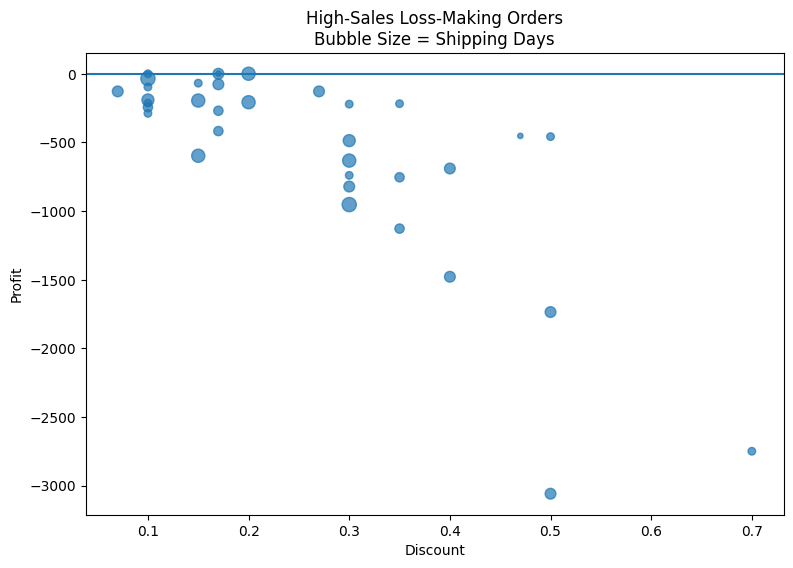

In [42]:
plt.figure(figsize=(9,6))

plt.scatter(
    risk_orders["discount"],
    risk_orders["profit"],
    s=risk_orders["ship_days"] * 15,
    alpha=0.7
)

plt.axhline(0)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("High-Sales Loss-Making Orders\nBubble Size = Shipping Days")


plt.show()


In [37]:
risk_orders["order_priority"].value_counts(normalize=True)

order_priority
High        0.473684
Medium      0.315789
Critical    0.105263
Low         0.105263
Name: proportion, dtype: float64

In [38]:
risk_orders["ship_mode"].value_counts(normalize=True)

ship_mode
Standard Class    0.447368
Second Class      0.289474
First Class       0.184211
Same Day          0.078947
Name: proportion, dtype: float64

In [39]:
risk_orders["region"].value_counts(normalize=True) * 100


region
Western Europe       31.578947
Southeastern Asia    23.684211
Oceania              13.157895
Eastern Asia         10.526316
Southern Asia         7.894737
Central America       5.263158
Northern Europe       2.631579
Southern Europe       2.631579
Caribbean             2.631579
Name: proportion, dtype: float64

In [40]:
risk_orders["profit"].corr(risk_orders["ship_days"])

np.float64(0.29523767417009056)

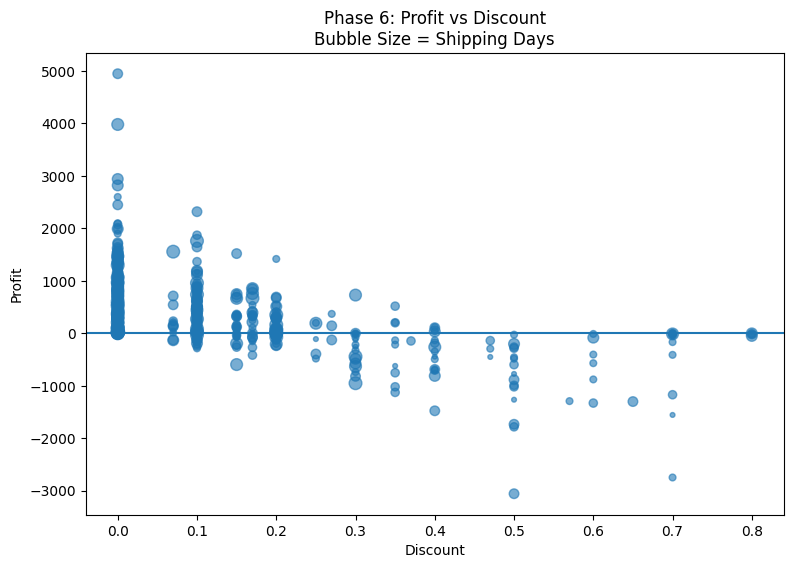

In [41]:
plt.figure(figsize=(9,6))

plt.scatter(
    df["discount"],
    df["profit"],
    s=df["ship_days"] * 12,
    alpha=0.6
)

plt.axhline(0)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Phase 6: Profit vs Discount\nBubble Size = Shipping Days")

plt.show()


### Final Insights 

This analysis revealed that **profitability in Global Superstore is driven more by pricing and operational decisions than by sales volume alone**.

Key findings include:
- **High sales do not guarantee profit** — losses frequently occur under high discounts and high-priority fulfillment.
- A clear **discount sweet spot (<10%)** exists where sales remain strong and profits are maximized.
- **Western Europe** consistently shows higher operational risk due to logistics and cost pressure.
- Several **high-selling products and customers are structurally unprofitable**, independent of discounts.
- Profit contribution follows the **80/20 rule** — ~20% of customers generate the majority of profit.
- **Operational risk is highest** when high discounts, urgent order priority, and shipping costs combine.

Overall, the business can significantly improve profitability by **tightening discount policies, re-evaluating high-priority orders, and applying region-specific pricing strategies** rather than chasing volume growth.
